In [ ]:
from sklearn.datasets import fetch_openml
data = fetch_openml(name='kin8nm', version=1, as_frame=True)
print(data.DESCR)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Author**:   
**Source**: Unknown -   
**Please cite**:   

This is data set is concerned with the forward kinematics of an 8 link
 robot arm. Among the existing variants of this data set we have used
 the variant 8nm, which is known to be highly non-linear and medium
 noisy.

 Original source: DELVE repository of data. 
 Source: collection of regression datasets by Luis Torgo (ltorgo@ncc.up.pt) at
 http://www.ncc.up.pt/~ltorgo/Regression/DataSets.html
 Characteristics: 8192 cases, 9 attributes (0 nominal, 9 continuous).

Downloaded from openml.org.


Данный набор данных дает описание прямой кинематики 8-звенного робота-манипулятора. Целевая переменная представляет собой непрерывные значения => набор данных будет использоваться для регрессии.

In [ ]:
import pandas as pd
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

print(df.head())
print(df.describe())

     theta1    theta2    theta3    theta4    theta5    theta6    theta7  \
0 -0.015119  0.360741  0.469398  1.309675  0.988024 -0.025493  0.664071   
1  0.360478 -0.301395  0.629183 -1.440146 -0.741637 -1.196749 -1.038444   
2  1.563238 -1.294753  0.078987  1.432937  1.149136 -1.292140  1.562988   
3  0.199485  0.901157 -1.356304 -0.080525 -0.976628  0.829894 -0.855649   
4  0.659737  0.120552 -0.008756  0.648839  0.626832 -0.646539  1.318074   

     theta8    target  
0  0.062763  0.536524  
1 -0.717461  0.308014  
2 -0.937731  0.518900  
3  0.930630  0.494151  
4 -0.899172  0.470218  
            theta1       theta2       theta3       theta4       theta5  \
count  8192.000000  8192.000000  8192.000000  8192.000000  8192.000000   
mean      0.009351    -0.007233     0.022792    -0.012945     0.007886   
std       0.904867     0.901496     0.900765     0.899186     0.906874   
min      -1.570611    -1.570681    -1.570669    -1.570295    -1.570664   
25%      -0.770328    -0.778319    

проверка на дисбаланс

In [ ]:
df['target'].value_counts()

0.534891    2
0.536524    1
0.613001    1
0.336548    1
0.972002    1
           ..
0.620730    1
0.492997    1
0.807967    1
1.113053    1
0.496853    1
Name: target, Length: 8191, dtype: int64

In [ ]:
df['target']

0       0.536524
1       0.308014
2       0.518900
3       0.494151
4       0.470218
          ...   
8187    0.486093
8188    0.696752
8189    0.803888
8190    0.887959
8191    0.496853
Name: target, Length: 8192, dtype: float64

In [ ]:
# Замена значений на 0 и 1
#df['target'] = df['target'].replace({'dead': 0, 'alive': 1}).astype(int)

In [ ]:
print("Пропущенные значения в данных:")
print(df.isnull().sum())

print("\nТипы данных:")
print(df.dtypes)

Пропущенные значения в данных:
theta1    0
theta2    0
theta3    0
theta4    0
theta5    0
theta6    0
theta7    0
theta8    0
target    0
dtype: int64

Типы данных:
theta1    float64
theta2    float64
theta3    float64
theta4    float64
theta5    float64
theta6    float64
theta7    float64
theta8    float64
target    float64
dtype: object


пропущенных значений нет

In [ ]:
X,y = data.data, data.target

In [ ]:
 #X['season'] = X['season'].cat.codes

In [ ]:
#X['seeded'] = X['seeded'].cat.codes

Обучите любую линейную модель, которая решает поставленную задачу. Выведите с помощью метода `score()` результат метрики оценки модели. Опишите какая метрика подсчитывается в методе `score()`.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model1 = LinearRegression().fit(X_train, y_train)

r2 = model1.score(X_train, y_train)
print("R2 train модели:", r2)
r2 = model1.score(X_test, y_test)
print("R2 test модели:", r2)

R2 train модели: 0.41509609578328843
R2 test модели: 0.4083491705257649


In [ ]:
#from sklearn.model_selection import train_test_split
#from sklearn.svm import SVR
#from sklearn.metrics import r2_score

# Разделение данных на признаки (X) и целевую переменную (y)
#X = df.drop(columns=['target'])
#y = df['target']

# Разделение данных на обучающий и тестовый наборы
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели SVR
#model = SVR()
#model.fit(X_train, y_train)

# Предсказание на тестовом наборе
#y_pred = model.predict(X_test)

# Оценка качества модели с помощью коэффициента детерминации R^2
#r2 = r2_score(y_test, y_pred)
#print("Коэффициент детерминации R^2 для модели SVR:", r2)


т.к модель решает задачу регрессии, то используются след метрики mape,mae,mse


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model1.predict(X_test)

# Вычисление MAE
mae = mean_absolute_error(y_test, y_pred)
print("MAE модели:", mae)

# Вычисление MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE модели:", mse)

# Вычисление MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("MAPE модели:", mape)


MAE модели: 0.1625876235608587
MSE модели: 0.0409376955769442
MAPE модели: 31.396583119444678


Для задач регрессии: Постройте совместное распределение теоретических и эмпирических значений целевой переменной. Сделайте вывод о наличии либо отсутствии систематической компоненты в отклонениях, их общей величине.


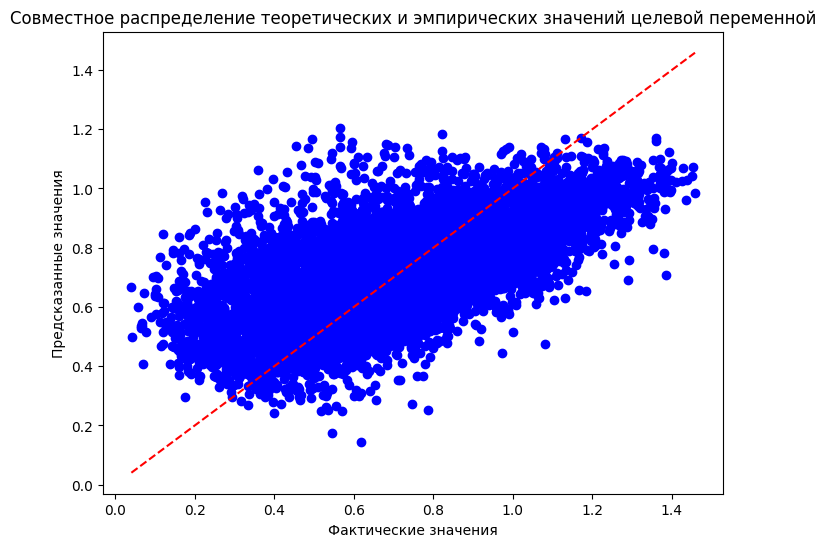

In [ ]:
import matplotlib.pyplot as plt

y_pred_1 = model1.predict(X)


# Построение графика рассеяния
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred_1, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], linestyle='--', color='red')
plt.title('Совместное распределение теоретических и эмпирических значений целевой переменной')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.show()


наличие систематической структуры может указывать на то, что модель не учитывает некоторые факторы или зависимости в данных.

Для задач регрессии: Постройте ту же модель, но с предварительной нормализацией значений признаков. Сделайте вывод о влиянии нормализации на качество работы модели.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Создание пайплайна с предварительной стандартизацией и обучением модели
pipeline = make_pipeline(StandardScaler(), LinearRegression())

# Обучение модели на обучающем наборе данных
pipeline.fit(X_train, y_train)

# Оценка качества модели на тестовом наборе данных
score = pipeline.score(X_test, y_test)
print("Качество работы модели с предварительной нормализацией:", score)


Качество работы модели с предварительной нормализацией: 0.4083491705257649


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


model3 = LinearRegression().fit(X_train, y_train)
r2 = model3.score(X_train, y_train)
print("R2 train модели:", r2)
r2 = model3.score(X_test, y_test)
print("R2 test модели:", r2)

R2 train модели: 0.41509609578328843
R2 test модели: 0.4083491705257649


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


model2 = LinearRegression().fit(X_train, y_train)
r2 = model2.score(X_train, y_train)
print("R2 train модели:", r2)
r2 = model2.score(X_test, y_test)
print("R2 test модели:", r2)

R2 train модели: 0.41509609578328843
R2 test модели: 0.4083491705257647


нормализация не влияет на качество работы модели


Обоснуйте выбор типа разбиения данных при кросс-валидации для вашей задачи машинного обучения. Обучите любую другую модель используя кросс-валидацию данных

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR


kf = KFold(n_splits=7,shuffle=True, random_state=42)

# poly = PolynomialFeatures(degree=2)
# x_poly = poly.fit_transform(x)
# model3 = LinearRegression()


model4 = SVR()

cv_results = cross_val_score(model4,                 # модель
                             X,                      # матрица признаков
                             y,                      # вектор цели
                             cv = kf,                # тип разбиения
                             scoring = None,         # метрика
                             n_jobs=-1)              # используются все ядра CPU

print("Кросс-валидация: ", cv_results)
print("Среднее по кросс-валидации: ", cv_results.mean())
print("Дисперсия по кросс-валидации: ", cv_results.std())

Кросс-валидация:  [0.90480259 0.89939167 0.9047317  0.91160444 0.91226292 0.90865348
 0.90942997]
Среднее по кросс-валидации:  0.9072681079118551
Дисперсия по кросс-валидации:  0.00422400059232961


т.к нет точной задачи, то вполне логично использовать стандартный выбор параметров как представлен в коде.

In [ ]:
X, y = data.data.to_numpy(), data.target.to_numpy()
for i, (train_index, test_index) in enumerate(kf.split(X,y)):
    print(f"Fold {i+1}:")
    print('Train: index={}\n Test:  index={}'.format(train_index, test_index))

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Fold 1:
Train: index=[   0    1    2 ... 8189 8190 8191]
 Test:  index=[  17   19   23 ... 8168 8179 8185]
Fold 2:
Train: index=[   1    2    3 ... 8189 8190 8191]
 Test:  index=[   0    8   14 ... 8178 8181 8186]
Fold 3:
Train: index=[   0    1    2 ... 8189 8190 8191]
 Test:  index=[  12   29   30 ... 8154 8184 8187]
Fold 4:
Train: index=[   0    1    2 ... 8187 8188 8190]
 Test:  index=[   6   18   24 ... 8182 8189 8191]
Fold 5:
Train: index=[   0    1    2 ... 8188 8189 8191]
 Test:  index=[   7   11   13 ... 8177 8183 8190]
Fold 6:
Train: index=[   0    4    6 ... 8189 8190 8191]
 Test:  index=[   1    2    3 ... 8170 8172 8188]
Fold 7:
Train: index=[   0    1    2 ... 8189 8190 8191]
 Test:  index=[   4    9   16 ... 8174 8176 8180]


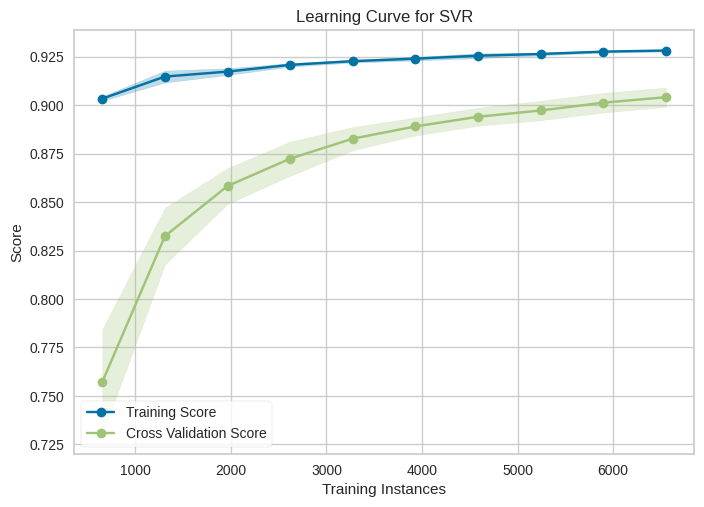

In [ ]:
from yellowbrick.model_selection import LearningCurve

visualizer = LearningCurve(SVR(), train_sizes=np.linspace(0.1, 1.0, 10)).fit(X, y).show()

Исследуйте как любой из гиперпараметров модели влияет на эффективность модели.

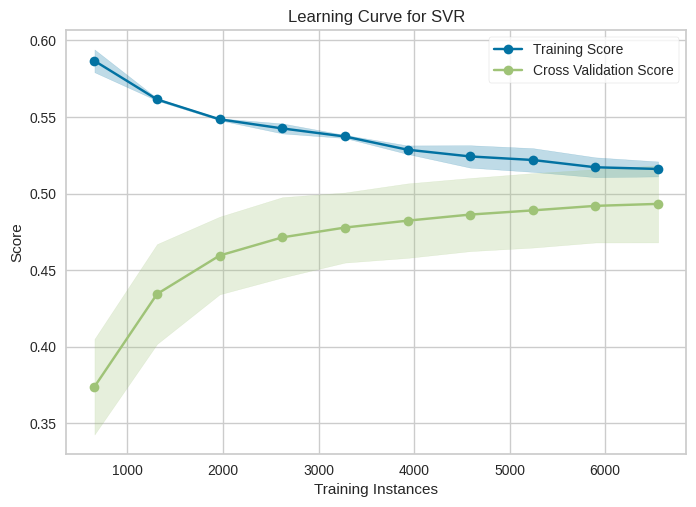

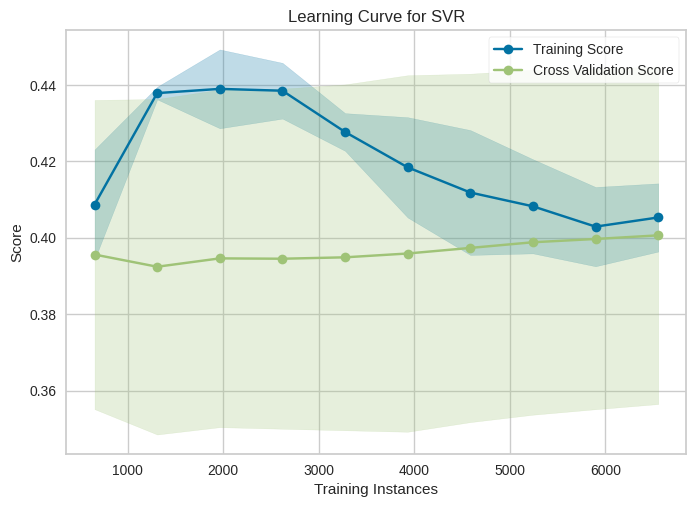

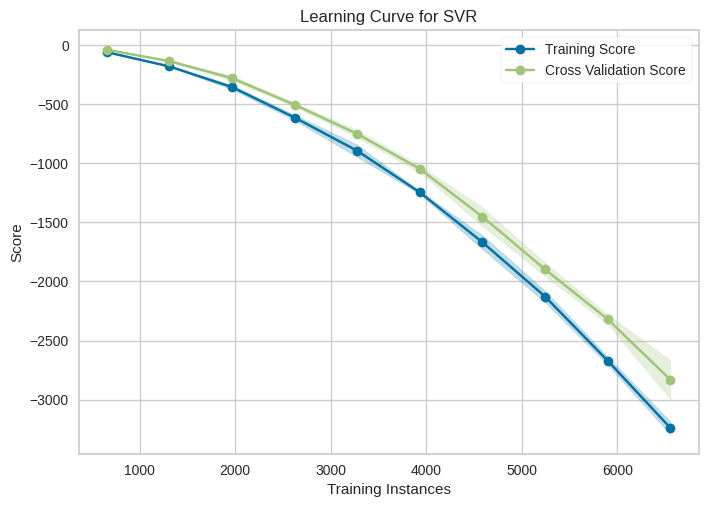

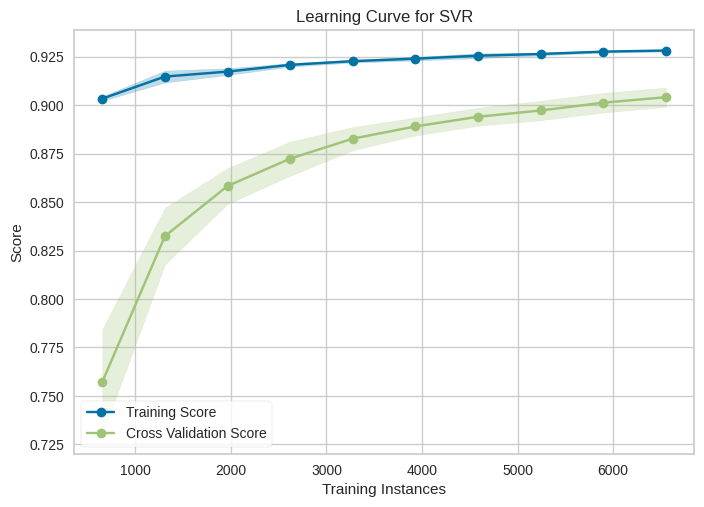

In [ ]:
k =  ['poly', 'linear', 'sigmoid', 'rbf']
for i in k:
  visualizer = LearningCurve(SVR(kernel=i), train_sizes=np.linspace(0.1, 1.0, 10)).fit(X, y).show()

как можно заметить, лучше всего работает с ядром rbf, хотя и кажется, что с poly тоже заметно лучше, в сравнении с другими ядрами, но если обратить внимание на ось У, то становится понятно, что это не так. в rbf идет небольшое переобучение.
